In [1]:
# Charger le jeu de données MNIST.. 
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

0.943
['2']


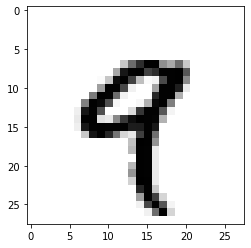

In [26]:
# Diviser la base de données en 49000 lignes pour l’apprentissage (training) et le reste pour les tests. 
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
#  Construire un modèle de classification ayant comme paramètre : hidden_layer_sizes = (50), 
# puis calculez la précession du classifieur ; 

clf = nn.MLPClassifier(hidden_layer_sizes=(50))
clf.fit(xtrain,ytrain)
print(clf.score(xtest, ytest))
# Afficher la classe de l’image 4 et sa classe prédite. 

print(clf.predict([mnist.data[4]]))
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 

In [20]:
# Calculez la précision en utilisant le package : metrics.precision_score(ytest_pr, ypredTest_pr,average='micro').
sklearn.metrics.precision_score(ytest,clf.predict(xtest), average='micro') 

0.9533809523809523

Training for nbcouches=2
Score for nbcouches=2 : 0.9592380952380952
ZeroOne for nbcouches=2 : 0.04076190476190478
Training for nbcouches=10
Score for nbcouches=10 : 0.9705238095238096
ZeroOne for nbcouches=10 : 0.029476190476190434
Training for nbcouches=20
Score for nbcouches=20 : 0.9706190476190476
ZeroOne for nbcouches=20 : 0.029380952380952396
Training for nbcouches=30
Score for nbcouches=30 : 0.9288095238095239
ZeroOne for nbcouches=30 : 0.07119047619047614
Training for nbcouches=40
Score for nbcouches=40 : 0.724047619047619
ZeroOne for nbcouches=40 : 0.27595238095238095
Training for nbcouches=50
Score for nbcouches=50 : 0.11404761904761905
ZeroOne for nbcouches=50 : 0.8859523809523809
Training for nbcouches=100
Score for nbcouches=100 : 0.11404761904761905
ZeroOne for nbcouches=100 : 0.8859523809523809


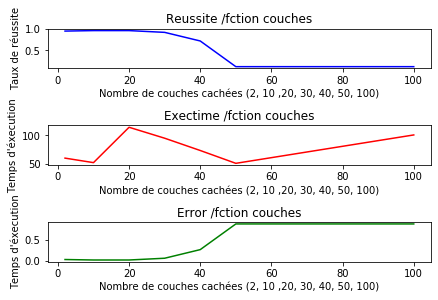

In [6]:
# Varier le nombre de couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur. 
# Sujet modifié : Varier le nombre de couches comme suit : 2 10 20 50 100 couches, avec à chaque fois 50 neurones 
# par couche
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
score=[]
times=[]
zeroone=[]
plt.subplot(3,1,1)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer)
    print("Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    print("ZeroOne for nbcouches="+str(nbcouches)+" : "+str(tempzeroone))
    zeroone.append(tempzeroone)
    score.append(tempscore)
    stop=time.time()
    exectime=stop-start
    times.append(exectime)
plt.plot([2,10,20,30,40,50,100],score,c='b')
plt.title("Reussite /fction couches")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Taux de réussite")
plt.subplot(3,1,2)
plt.plot([2,10,20,30,40,50,100],times,c='r')
plt.title("Exectime /fction couches")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Temps d'éxecution")
plt.subplot(3,1,3)
plt.plot([2,10,20,30,40,50,100],zeroone,c='g')
plt.title("Error /fction couches")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Temps d'éxecution")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [8]:
# Construire cinq modèles de classification des données mnist, avec des
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de
# couches entre 10 et 300 neurones au choix d’une façon aléatoire. Quelles
# sont les performances en taux de bonne classification et en temps
# d’apprentissage obtenus pour chaque modèle ? Utilisez la fonction time() du
# package time pour mesurer le temps d’apprentissage d’un modèle.

# Sujet modifié : Deux modèles : un  de 50 couches. Première couche = 60 neurone, couche suivante = nb neurone-1
#                               deuxieme de 20 couches. première couches 60 neurones, couche suivante nb-neurone-2
# modèle 1
layers=(60,)
for i in range(10,59):
    layers= layers+((69-i),)
start=time.time()
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
clf = nn.MLPClassifier(hidden_layer_sizes=layers)
clf.fit(xtrain,ytrain)
tempscore=clf.score(xtest, ytest)
tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
stop=time.time()
print("Score for modele 1= "+str(tempscore))
print("Error for modele 1= "+str(tempzeroone))
print("ExecTime for modele 1= "+str(stop-start))

Score for modele 1= 0.11047619047619048
Error for modele 1= 0.8895238095238095
ExecTime for modele 1= 40.613038778305054


In [10]:
# modèle 2
layers=(60,)
for i in range(11,48,2):
    layers= layers+((69-i),)
start=time.time()
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
clf = nn.MLPClassifier(hidden_layer_sizes=layers)
clf.fit(xtrain,ytrain)
tempscore=clf.score(xtest, ytest)
tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
stop=time.time()
print("Score for modele 2= "+str(tempscore))
print("Error for modele 2= "+str(tempzeroone))
print("ExecTime for modele 2= "+str(stop-start))

Score for modele 2= 0.9715714285714285
Error for modele 2= 0.02842857142857147
ExecTime for modele 2= 125.46977996826172


With Adam : Training for nbcouches=2
With Adam : Score for nbcouches=2 : 0.9584761904761905
With Adam : Training for nbcouches=10
With Adam : Score for nbcouches=10 : 0.9717619047619047
With Adam : Training for nbcouches=20
With Adam : Score for nbcouches=20 : 0.9632857142857143
With Adam : Training for nbcouches=30
With Adam : Score for nbcouches=30 : 0.9479047619047619
With Adam : Training for nbcouches=40
With Adam : Score for nbcouches=40 : 0.6335238095238095
With Adam : Training for nbcouches=50
With Adam : Score for nbcouches=50 : 0.6415238095238095
With Adam : Training for nbcouches=100
With Adam : Score for nbcouches=100 : 0.113
With L-BFGS : Training for nbcouches=2
With L-BFGS : Score for nbcouches=2 : 0.0848095238095238
With L-BFGS : Training for nbcouches=10
With L-BFGS : Score for nbcouches=10 : 0.9636190476190476
With L-BFGS : Training for nbcouches=20
With L-BFGS : Score for nbcouches=20 : 0.695
With L-BFGS : Training for nbcouches=30
With L-BFGS : Score for nbcouches=30

/usr/local/insa/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


With SGD : Score for nbcouches=2 : 0.9212857142857143
With SGD : Training for nbcouches=10
With SGD : Score for nbcouches=10 : 0.954952380952381
With SGD : Training for nbcouches=20
With SGD : Score for nbcouches=20 : 0.9602380952380952
With SGD : Training for nbcouches=30
With SGD : Score for nbcouches=30 : 0.9606666666666667
With SGD : Training for nbcouches=40
With SGD : Score for nbcouches=40 : 0.113
With SGD : Training for nbcouches=50
With SGD : Score for nbcouches=50 : 0.113
With SGD : Training for nbcouches=100
With SGD : Score for nbcouches=100 : 0.113


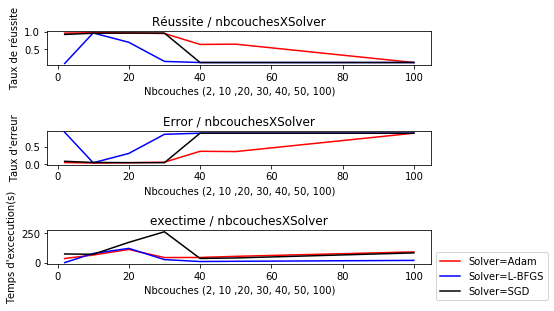

In [11]:
# Etudier la convergence des algorithmes d'optimisation disponibles : L-BFGS, SGD et Adam
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
scoreAdam=[]
scoreLBFGS=[]
scoreSGD=[]
timeAdam=[]
timeLBFGS=[]
timeSGD=[]
errorAdam=[]
errorLBFGS=[]
errorSGD=[]
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='adam')
    print("With Adam : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With Adam : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreAdam.append(tempscore)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errorAdam.append(tempzeroone)
    stop=time.time()
    temptime=stop-start
    timeAdam.append(temptime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='lbfgs')
    print("With L-BFGS : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With L-BFGS : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreLBFGS.append(tempscore)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errorLBFGS.append(tempzeroone)
    stop=time.time()
    temptime=stop-start
    timeLBFGS.append(temptime)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,solver='sgd')
    print("With SGD : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With SGD : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreSGD.append(tempscore)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errorSGD.append(tempzeroone)
    stop=time.time()
    temptime=stop-start
    timeSGD.append(temptime)
plt.subplot(3,1,1)
plt.plot([2,10,20,30,40,50,100],scoreAdam,'r',label="Solver=Adam")
plt.plot([2,10,20,30,40,50,100],scoreLBFGS,'b',label="Solver=L-BFGS")
plt.plot([2,10,20,30,40,50,100],scoreSGD,'k',label="Solver=SGD")
plt.title("Réussite / nbcouchesXSolver")
plt.xlabel("Nbcouches (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Taux de réussite")

plt.subplot(3,1,2)
plt.plot([2,10,20,30,40,50,100],errorAdam,'r',label="Solver=Adam")
plt.plot([2,10,20,30,40,50,100],errorLBFGS,'b',label="Solver=L-BFGS")
plt.plot([2,10,20,30,40,50,100],errorSGD,'k',label="Solver=SGD")
plt.title("Error / nbcouchesXSolver")
plt.xlabel("Nbcouches (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Taux d'erreur")

plt.subplot(3,1,3)
plt.plot([2,10,20,30,40,50,100],timeAdam,'r',label="Solver=Adam")
plt.plot([2,10,20,30,40,50,100],timeLBFGS,'b',label="Solver=L-BFGS")
plt.plot([2,10,20,30,40,50,100],timeSGD,'k',label="Solver=SGD")
plt.title("exectime / nbcouchesXSolver")
plt.xlabel("Nbcouches (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Temps d'excecution(s)")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.show()

With identity : Training for nbcouches=2
With identity : Score for nbcouches=2 : 0.9085714285714286
With identity : Training for nbcouches=10
With identity : Score for nbcouches=10 : 0.9104761904761904
With identity : Training for nbcouches=20
With identity : Score for nbcouches=20 : 0.9047142857142857
With identity : Training for nbcouches=30
With identity : Score for nbcouches=30 : 0.9063333333333333
With identity : Training for nbcouches=40
With identity : Score for nbcouches=40 : 0.8992857142857142
With identity : Training for nbcouches=50
With identity : Score for nbcouches=50 : 0.8977619047619048
With identity : Training for nbcouches=100
With identity : Score for nbcouches=100 : 0.8871428571428571
With logistic : Training for nbcouches=2
With logistic : Score for nbcouches=2 : 0.9543333333333334
With logistic : Training for nbcouches=10
With logistic : Score for nbcouches=10 : 0.1110952380952381
With logistic : Training for nbcouches=20
With logistic : Score for nbcouches=20 : 0

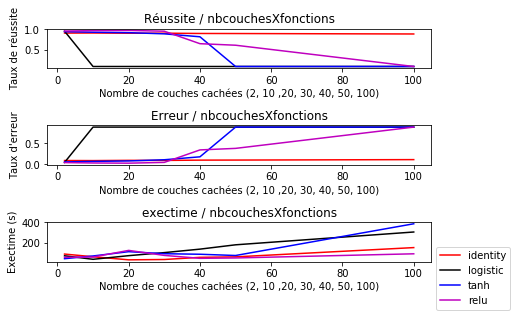

In [12]:
# Varier les fonctions d'activation : identity, logistic, tanh, relu
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
scoreidentity=[]
scorelogistic=[]
scoretanh=[]
scorerelu=[]
erroridentity=[]
errorlogistic=[]
errortanh=[]
errorrelu=[]
timeidentity=[]
timelogistic=[]
timetanh=[]
timerelu=[]
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='identity')
    print("With identity : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With identity : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoreidentity.append(tempscore)
    stop=time.time()
    exectime=stop-start
    timeidentity.append(exectime)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    erroridentity.append(tempzeroone)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='logistic')
    print("With logistic : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With logistic : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scorelogistic.append(tempscore)
    stop=time.time()
    exectime=stop-start
    timelogistic.append(exectime)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errorlogistic.append(tempzeroone)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='tanh')
    print("With tanh : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With tanh : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scoretanh.append(tempscore)
    stop=time.time()
    exectime=stop-start
    timetanh.append(exectime)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errortanh.append(tempzeroone)
for nbcouches in [2,10,20,30,40,50,100]:
    start=time.time()
    layer= (50,)*nbcouches
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,activation='relu')
    print("With relu : Training for nbcouches="+str(nbcouches))
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    print("With relu : Score for nbcouches="+str(nbcouches)+" : "+str(tempscore))
    scorerelu.append(tempscore)
    stop=time.time()
    exectime=stop-start
    timerelu.append(exectime)
    tempzeroone=metrics.zero_one_loss(ytest,clf.predict(xtest))
    errorrelu.append(tempzeroone)
plt.subplot(3,1,1)
plt.plot([2,10,20,30,40,50,100],scoreidentity,'r',label="identity")
plt.plot([2,10,20,30,40,50,100],scorelogistic,'k',label="logistic")
plt.plot([2,10,20,30,40,50,100],scoretanh,'b',label="tanh")
plt.plot([2,10,20,30,40,50,100],scorerelu,'m',label="relu")
plt.title("Réussite / nbcouchesXfonctions")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Taux de réussite")

plt.subplot(3,1,2)
plt.plot([2,10,20,30,40,50,100],erroridentity,'r',label="identity")
plt.plot([2,10,20,30,40,50,100],errorlogistic,'k',label="logistic")
plt.plot([2,10,20,30,40,50,100],errortanh,'b',label="tanh")
plt.plot([2,10,20,30,40,50,100],errorrelu,'m',label="relu")
plt.title("Erreur / nbcouchesXfonctions")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Taux d'erreur")

plt.subplot(3,1,3)
plt.plot([2,10,20,30,40,50,100],timeidentity,'r',label="identity")
plt.plot([2,10,20,30,40,50,100],timelogistic,'k',label="logistic")
plt.plot([2,10,20,30,40,50,100],timetanh,'b',label="tanh")
plt.plot([2,10,20,30,40,50,100],timerelu,'m',label="relu")
plt.title("exectime / nbcouchesXfonctions")
plt.xlabel("Nombre de couches cachées (2, 10 ,20, 30, 40, 50, 100)")
plt.ylabel("Exectime (s)")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
##### Overfitting : en classifiant toutes les valeurs et en cherchant à optimiser le taux de réussite, on prend
# en compte un "bruit" lors de la classification. En d'autres termes, on arrivera peut etre à un bon taux de
# réussite sur les tests, mais la précision ne sera pas forcément bonne. Une fonction pour contrer cet overfittig
# est employée par défaut, avec un paramètre la modulant (alpha). Par défaut dans les tests précédents on a 
# alpha très proche de 0, on ne contre pas l'overfitting au profit du taux de réussite mais au détriment
# de la précision. En agissant dessus, on aura peut etre un taux de réussite plus bas, mais notre modèle sera 
# plus précis.



With alpha = 0.001 : ScoreTest=0.968
With alpha = 0.001 : ScoreTrain=0.9932857142857143
With alpha = 0.1 : ScoreTest=0.9740952380952381
With alpha = 0.1 : ScoreTrain=0.9946938775510205
With alpha = 0.2 : ScoreTest=0.9695238095238096
With alpha = 0.2 : ScoreTrain=0.9908979591836735
With alpha = 0.3 : ScoreTest=0.9697142857142858
With alpha = 0.3 : ScoreTrain=0.9927142857142857
With alpha = 0.4 : ScoreTest=0.9718571428571429
With alpha = 0.4 : ScoreTrain=0.9928367346938776
With alpha = 0.5 : ScoreTest=0.9653809523809523
With alpha = 0.5 : ScoreTrain=0.9829795918367347
With alpha = 0.6 : ScoreTest=0.9716190476190476
With alpha = 0.6 : ScoreTrain=0.9916122448979592
With alpha = 0.7 : ScoreTest=0.974
With alpha = 0.7 : ScoreTrain=0.9917142857142857
With alpha = 0.8 : ScoreTest=0.9728095238095238
With alpha = 0.8 : ScoreTrain=0.9911020408163266
With alpha = 0.9 : ScoreTest=0.9665714285714285


With alpha = 0.9 : ScoreTrain=0.9859183673469388


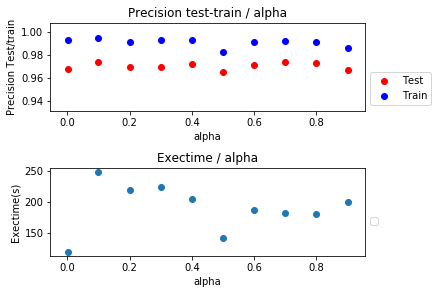

In [14]:
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data, mnist.target,
train_size=0.7)
nbcouches=20
layer= (50,)*nbcouches
scoreTest=[]
scoreTrain=[]
times=[]
for alpha in (0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9):
    start=time.time()
    clf = nn.MLPClassifier(hidden_layer_sizes=layer,alpha=alpha)
    clf.fit(xtrain,ytrain)
    tempscore=clf.score(xtest, ytest)
    scoreTest.append(tempscore)
    print("With alpha = "+str(alpha)+" : ScoreTest="+str(tempscore))
    tempscore=clf.score(xtrain, ytrain)
    print("With alpha = "+str(alpha)+" : ScoreTrain="+str(tempscore))
    scoreTrain.append(tempscore)
    stop=time.time()
    length=stop-start
    times.append(length)
plt.subplot(2,1,1)
plt.scatter((0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),scoreTest,c='r',label='Test')
plt.title("Precision test-train / alpha")
plt.xlabel("alpha")
plt.ylabel("Precision Test/train")
plt.scatter((0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),scoreTrain,c='b',label='Train')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.subplot(2,1,2)
plt.scatter((0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),times)
plt.title("Exectime / alpha")
plt.xlabel("alpha")
plt.ylabel("Exectime(s)")
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.show()